# KMeans - Iris Dataset

In [1]:
import random

seed = 13
max_parallel_jobs = 10
random.seed(seed)

## Carregamento do dataset

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()
X, y = dataset.data[:, 2:4], dataset.target
x_complete = dataset.data[:, :]

In [3]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

## Visualização 2D das features selecionadas

Text(0, 0.5, 'Petal width')

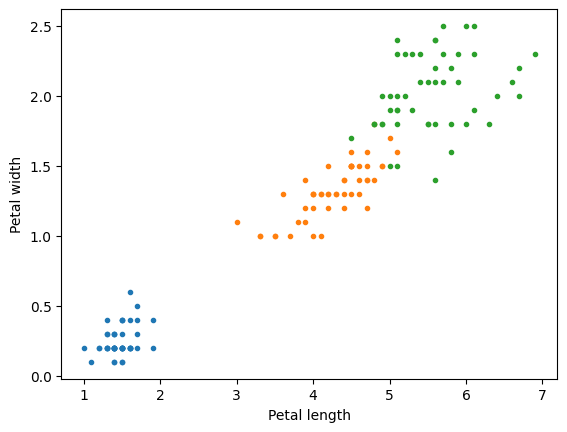

In [4]:
from matplotlib import pyplot

n_distinct_y = len(set(y))

for i in range(n_distinct_y):
    target_name = dataset.target_names[i]
    pyplot.plot(X[y == i, 0], X[y == i, 1], '.', label=target_name)
pyplot.xlabel('Petal length')
pyplot.ylabel('Petal width')

## Otimização de parâmetros

In [5]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Melhor:
# {'algorithm': 'lloyd', 'init': 'k-means++', 'n_init': 21, 'tol': 0.001},
# {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100},
# {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_init': 21, 'tol': 0.001},
# {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_init': 21, 'tol': 0.001}
grid_params = {
    'init': ['k-means++', 'random'],
    'n_init': list(range(1, 101, 5)),
    'max_iter': list(range(100, 1001, 200)),
    'tol': [1 / 10 ** i for i in range(1, 11, 2)],
    'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
}

ratio_use = 10
start_index = int(len(X) / 100.00 * ratio_use)
half_x = X[:start_index]
half_y = y[:start_index]


def accuracy_scorer(clf, data, target):
    return accuracy_score(target, clf.predict(data))

kmeans = KMeans(n_clusters=3, random_state=seed)
grid_search = GridSearchCV(kmeans, grid_params, n_jobs=max_parallel_jobs, scoring=accuracy_scorer)
grid_search.fit(half_x, half_y)
cross_val = mean(cross_val_score(grid_search, X, y))
cross_val, grid_search.best_params_, grid_search.best_score_

(0.49333333333333335,
 {'algorithm': 'lloyd', 'init': 'k-means++', 'n_init': 6},
 0.6666666666666666)

In [10]:
from sklearn.cluster import KMeans

kmeans_params = {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_init': 6, 'tol': 0.001}
kmeans = KMeans(**kmeans_params, n_clusters=3, random_state=seed)
kmeans.fit(x_complete[:], y[:])
predicted = kmeans.predict(x_complete)
accuracy_score(y, predicted)

0.24